In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[Air Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Air+Quality)
### Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

### Data Set description:

- 0 Date (DD/MM/YYYY)
- 1 Time (HH.MM.SS)
- 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- 7 True hourly averaged NOx concentration in ppb (reference analyzer)
- 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
- 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
- 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- 12 Temperature in Â°C
- 13 Relative Humidity (%)
- 14 AH Absolute Humidity

In [2]:
# Load the data set
df = pd.read_excel('data/AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
# Display the types of each column
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [4]:
# Summary statistics of each column
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


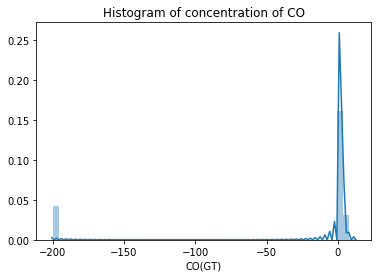

In [5]:
# Print distribution of concentration of CO
sns.distplot(df["CO(GT)"].dropna()).set_title("Histogram of concentration of CO")
plt.show()

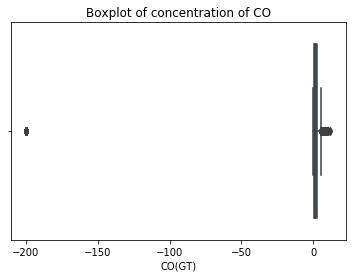

In [6]:
# Print boxplot of concentration of CO
sns.boxplot(df["CO(GT)"].dropna()).set_title("Boxplot of concentration of CO")
plt.show()

With the mean at the point -34.21 it shows a distribution with a group of outliers concentrated on the same point of -200.00 (missing values according to the description of the dataset).

These missing values are clearly afecting the data. For the sake of simplicity and purpose of this notebook I'll treat all -200 values as undefined (NaN - Not a Number). 

In [7]:
# replace all -200 with NaN
df.replace(-200, np.NaN, inplace=True)

In [8]:
# Summary statistics of each column
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.453252,217.084571,204.459921,7.449640,266.829000,212.971224,256.815106,48.359250,346.204540,398.480897,8.832888,17.316389,0.403813
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,936.750000,67.000000,4.436942,734.375000,98.000000,657.875000,78.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,1.800000,1063.000000,150.000000,8.239851,909.000000,179.800000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.900000,1231.250000,297.000000,13.988478,1116.250000,326.000000,969.250000,142.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


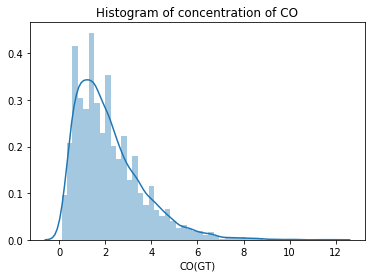

In [9]:
# Print distribution of concentration of CO
sns.distplot(df["CO(GT)"].dropna()).set_title("Histogram of concentration of CO")
plt.show()

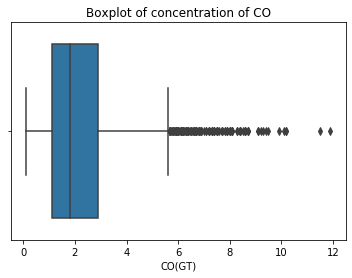

In [10]:
# Print boxplot of concentration of CO
sns.boxplot(df["CO(GT)"].dropna()).set_title("Boxplot of concentration of CO")
plt.show()

In [11]:
# Create a column with the day of the week names for each date
df['day_of_week'] = df['Date'].dt.day_name()
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,day_of_week
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,Wednesday
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,Wednesday
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,Wednesday
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,Wednesday
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,Wednesday


In [12]:
# Show the datatypes of each column, notice the new column 'day_of_week' as type object
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
day_of_week              object
dtype: object

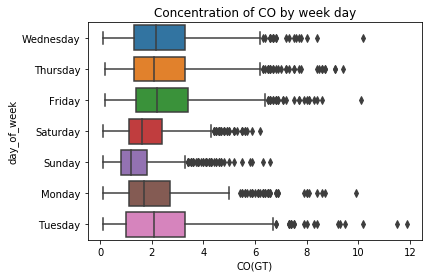

In [13]:
# Plot the boxplots categorized by the day of the week
sns.boxplot(x=df["CO(GT)"], y=df['day_of_week']).set_title("Concentration of CO by week day")
plt.show()

As expected on Sunday there's a lower concentration of CO.